## A Simplified Introduction for Beginners
This Notebook will try to cover 
* Data exploration
* Feature Engineering
* Model Building
* Evaluation
* Competition Submittion 

### The First Step!
You will probably have the below code, the moment you set up a Notebook within the Titanic dataset competition
Just run it by pressing Control+Enter
and Make a note of the files and their locations that it will print - it woud be needed for us to load these files for the rest of the project:
* /kaggle/input/titanic/train.csv
* /kaggle/input/titanic/gender_submission.csv
* /kaggle/input/titanic/test.cs



In [3]:


# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/Users/Sachin/Code/kaggle'):#('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/Users/Sachin/Code/kaggle\titanic\gender_submission.csv
/Users/Sachin/Code/kaggle\titanic\test.csv
/Users/Sachin/Code/kaggle\titanic\Titanic Solution Simplified for Beginners.ipynb
/Users/Sachin/Code/kaggle\titanic\train.csv
/Users/Sachin/Code/kaggle\titanic\.ipynb_checkpoints\Titanic Solution Simplified for Beginners-checkpoint.ipynb


In [6]:
# data analysis and wrangling
import pandas as pd
import numpy as np
import random as rnd

# visualization
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# machine learning
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier

# Any results you write to the current directory are saved as output.

In [177]:
#train_df = pd.read_csv('/kaggle/input/titanic/train.csv')
#test_df = pd.read_csv('/kaggle/input/titanic/test.csv')
train_df = pd.read_csv('train.csv')
test_df = pd.read_csv('test.csv')
combined = [train_df, test_df]
#full = train_df.append\
test_df.describe()
#combine

,PassengerId,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,3.000000,76.000000,8.000000,9.000000,512.329200


In [181]:
combined = pd.concat([train_df, test_df])
combined



,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
413,1305,NaN,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,NaN,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,NaN,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,NaN,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


In [182]:
#train_df.head(20)

### Missing Value Treatmeant
#### Are there any cells that dont have any values, i.e are there any Missing Values ?



In [185]:
combined.isna().any()
combined.columns[combined.isna().any()].tolist()

['Survived', 'Age', 'Fare', 'Cabin', 'Embarked']

In [189]:
combined[combined.Survived.isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,NaN,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,NaN,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,NaN,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,NaN,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,NaN,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
413,1305,NaN,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,NaN,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,NaN,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,NaN,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


So it is showing that columns which have NaN values are : "Age", "Cabin", "Embarked"

We might want to look into imputing i.e filling up these values if they are relevant for constructing features which would need to be provided as inputs into a model

Before that let us see for how many rows for each of these three columsn there are missing values

In [89]:
def EDA_nullStats(df):
    total = df.isnull().sum().sort_values(ascending=False)
    percentage = round(df.isnull().sum().sort_values(ascending=False)/len(df)*100,2)
    inspection = pd.concat([total,percentage], axis=1, keys=['Total Nulls', 'Percentage of Nulls'])
    inspection['Total rows'] = len(train_df)
    return(inspection)

In [187]:
EDA_nullStats(combined)

,Total Nulls,Percentage of Nulls,Total rows
Cabin,1014,77.46,891
Survived,418,31.93,891
Age,263,20.09,891
Embarked,2,0.15,891
Fare,1,0.08,891
Ticket,0,0.00,891
Parch,0,0.00,891
SibSp,0,0.00,891
Sex,0,0.00,891
Name,0,0.00,891


In [91]:
EDA_nullStats(test_df)

,Total Nulls,Percentage of Nulls,Total rows
Cabin,327,78.23,891
Age,86,20.57,891
Fare,1,0.24,891
Embarked,0,0.00,891
Ticket,0,0.00,891
Parch,0,0.00,891
SibSp,0,0.00,891
Sex,0,0.00,891
Name,0,0.00,891
Pclass,0,0.00,891


### Age feature

Now "Age" Seems important as a feature for survival, so since it has 20% nearly empty values, we should not think of ignoring the rows with missing Age, we should try to fill up missing values with some sort of imputation.

For now we could try mean imputation for Age

In [92]:
def EDA_columnValueStats( df, column_name):
    percentage = pd.DataFrame(round(df.loc[:,column_name].value_counts(dropna=False, normalize=True)*100,2))
    total = pd.DataFrame(df.loc[:,column_name].value_counts(dropna=False))
    
    total.columns   = ['Total']
    percentage.columns = ['Percentage']
    
    return(pd.concat([total,percentage], axis = 1))


In [93]:
EDA_columnValueStats(train_df,"Age")


,Total,Percentage
NaN,177,19.87
24.00,30,3.37
22.00,27,3.03
18.00,26,2.92
28.00,25,2.81
...,...,...
36.50,1,0.11
55.50,1,0.11
66.00,1,0.11
23.50,1,0.11


In [94]:
EDA_columnValueStats(test_df,"Age")


,Total,Percentage
NaN,86,20.57
24.0,17,4.07
21.0,17,4.07
22.0,16,3.83
30.0,15,3.59
...,...,...
60.5,1,0.24
26.5,1,0.24
76.0,1,0.24
67.0,1,0.24


In [68]:
train_df[train_df['Age'].notna()]['Age'].mean() == train_df['Age'].mean()

True

In [95]:
missing_value = train_df.Age.median()
print(missing_value)

28.0

In [96]:
train_df.Age.fillna(missing_value, inplace=True)

In [193]:
missing_value = combined.Age.median()
print(missing_value)
combined.Age.fillna(missing_value, inplace=True)

24.0


In [192]:
EDA_columnValueStats(combined,"Age")


,Total,Percentage
12.718872,263,20.09
24.000000,47,3.59
22.000000,43,3.28
21.000000,41,3.13
30.000000,40,3.06
...,...,...
26.500000,1,0.08
76.000000,1,0.08
22.500000,1,0.08
74.000000,1,0.08


In [101]:
missing_value = test_df.Age.median()
print(missing_value)
test_df.Age.fillna(missing_value, inplace=True)
EDA_columnValueStats(test_df,"Age")


27.0


,Total,Percentage
27.0,98,23.44
24.0,17,4.07
21.0,17,4.07
22.0,16,3.83
30.0,15,3.59
...,...,...
7.0,1,0.24
60.5,1,0.24
26.5,1,0.24
76.0,1,0.24


### Embarked Feature

In [102]:
EDA_columnValueStats(train_df,"Embarked")

,Total,Percentage
S,644,72.28
C,168,18.86
Q,77,8.64
NaN,2,0.22


In [103]:
train_df[train_df.Embarked.isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
61,62,1,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,B28,NaN
829,830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,B28,NaN


Since imputing the Embarked feature requires a bit more exploration as it is categorical variable. Let us see if the other columns have some resemblance with Embarked.

Impute value with C, since C is the most common value for PClasss=1 and Fare around 80

In [104]:
train_df.Embarked.fillna("C", inplace=True)
train_df[train_df.Embarked.isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked


In [194]:
combined.Embarked.fillna("C", inplace=True)
combined[combined.Embarked.isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked


### Fare feature

In [105]:
test_df[test_df.Fare.isnull()]

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
152,1044,3,"Storey, Mr. Thomas",male,60.5,0,0,3701,NaN,NaN,S


Impute the missing Fare columns - there was only one such row in TEST

missing_value = test[(test.Pclass == 3) & 
                     (test.Embarked == "S") & 
                     (test.Sex == "male")].Fare.mean()

replace the test.fare null values with test.fare mean
test.Fare.fillna(missing_value, inplace=True)


In [198]:
missing_value = test_df[(test_df.Pclass == 3) & 
                     (test_df.Embarked == "S") & 
                     (test_df.Sex == "male")].Fare.mean()
print(missing_value)
## replace the test.fare null values with test.fare mean
test_df.Fare.fillna(missing_value, inplace=True)

12.718871999999998


In [197]:
missing_value = combined[(combined.Pclass == 3) & 
                     (combined.Embarked == "S") & 
                     (combined.Sex == "male")].Fare.mean()
## replace the test.fare null values with test.fare mean
print(missing_value)
combined.Fare.fillna(missing_value, inplace=True)

13.145977260273979


### Featurization for Categorical variables


In [220]:
train_df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [340]:
combined[combined["Cabin"].notna()][["Cabin","Survived"]]
cabin = pd.DataFrame()
cabin["Cabin"] = combined["Cabin"]
cabin["CabinClass"] = cabin['Cabin'].map(lambda s: s[0] if type(s) is str and len(s)>0 else 'U')
cabin


,Cabin,CabinClass
0,NaN,U
1,C85,C
2,NaN,U
3,C123,C
4,NaN,U
...,...,...
413,NaN,U
414,C105,C
415,NaN,U
416,NaN,U


In [358]:
#categorical variables
input_df = pd.DataFrame()
input_df = pd.get_dummies(combined[['Pclass','Embarked','Sex']], columns=['Embarked', 'Sex']).copy()
#input_df["CabinClass"] = cabin["CabinClass"]
CC = pd.get_dummies(cabin[['CabinClass']], columns=['CabinClass']).copy()
input_df = pd.concat([input_df, CC], axis=1)
input_df


,Pclass,Embarked_C,Embarked_Q,Embarked_S,Sex_female,Sex_male,CabinClass_A,CabinClass_B,CabinClass_C,CabinClass_D,CabinClass_E,CabinClass_F,CabinClass_G,CabinClass_T,CabinClass_U
0,3,0,0,1,0,1,0,0,0,0,0,0,0,0,1
1,1,1,0,0,1,0,0,0,1,0,0,0,0,0,0
2,3,0,0,1,1,0,0,0,0,0,0,0,0,0,1
3,1,0,0,1,1,0,0,0,1,0,0,0,0,0,0
4,3,0,0,1,0,1,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
413,3,0,0,1,0,1,0,0,0,0,0,0,0,0,1
414,1,1,0,0,1,0,0,0,1,0,0,0,0,0,0
415,3,0,0,1,0,1,0,0,0,0,0,0,0,0,1
416,3,0,0,1,0,1,0,0,0,0,0,0,0,0,1


In [359]:
#Categorization
family = pd.DataFrame()
family["familysize"] = combined['Parch']+combined['SibSp']+1
family

,familysize
0,2
1,2
2,1
3,2
4,1
...,...
413,1
414,1
415,1
416,1


In [360]:
agecategory = pd.DataFrame()
agecategory["baby"] = combined['Age'].map(lambda s: 1 if s<1 else 0)
agecategory["infant"] = combined['Age'].map(lambda s: 1 if s>=1 and s<4 else 0)
agecategory["child"] = combined['Age'].map(lambda s: 1 if s>=4 and s<10 else 0)
agecategory["teen"] = combined['Age'].map(lambda s: 1 if s>=10 and s<16 else 0)
agecategory["adult"] = combined['Age'].map(lambda s: 1 if s>=16 and s<50 else 0)
agecategory["oldadult"] = combined['Age'].map(lambda s: 1 if s>=50 and s<60 else 0)
agecategory["senior"] = combined['Age'].map(lambda s: 1 if s>=60 else 0)

EDA_columnValueStats(agecategory, "baby")
agecategory.describe()

,baby,infant,child,teen,adult,oldadult,senior
count,1309.000000,1309.000000,1309.000000,1309.000000,1309.000000,1309.000000,1309.000000
mean,0.009167,0.022154,0.031322,0.226127,0.627196,0.053476,0.030558
std,0.095343,0.147242,0.174252,0.418482,0.483735,0.225067,0.172182
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
75%,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [361]:
input_df[["baby","infant","child","teen","adult","oldadult","senior"]] = agecategory[["baby","infant","child","teen","adult","oldadult","senior"]]

In [362]:
input_df[[ "Pclass", "Fare"]] = combined[[ "Pclass", "Fare"]]
input_df["familysize"] = family["familysize"]
input_df

,Pclass,Embarked_C,Embarked_Q,Embarked_S,Sex_female,Sex_male,CabinClass_A,CabinClass_B,CabinClass_C,CabinClass_D,...,CabinClass_U,baby,infant,child,teen,adult,oldadult,senior,Fare,familysize
0,3,0,0,1,0,1,0,0,0,0,...,1,0,0,0,0,1,0,0,7.2500,2
1,1,1,0,0,1,0,0,0,1,0,...,0,0,0,0,0,1,0,0,71.2833,2
2,3,0,0,1,1,0,0,0,0,0,...,1,0,0,0,0,1,0,0,7.9250,1
3,1,0,0,1,1,0,0,0,1,0,...,0,0,0,0,0,1,0,0,53.1000,2
4,3,0,0,1,0,1,0,0,0,0,...,1,0,0,0,0,1,0,0,8.0500,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
413,3,0,0,1,0,1,0,0,0,0,...,1,0,0,0,1,0,0,0,8.0500,1
414,1,1,0,0,1,0,0,0,1,0,...,0,0,0,0,0,1,0,0,108.9000,1
415,3,0,0,1,0,1,0,0,0,0,...,1,0,0,0,0,1,0,0,7.2500,1
416,3,0,0,1,0,1,0,0,0,0,...,1,0,0,0,1,0,0,0,8.0500,1


In [364]:
input_df["Age"] = combined["Age"].map(lambda s: 1 if s<1 else round(s))
input_df.describe()
input_df

,Pclass,Embarked_C,Embarked_Q,Embarked_S,Sex_female,Sex_male,CabinClass_A,CabinClass_B,CabinClass_C,CabinClass_D,...,baby,infant,child,teen,adult,oldadult,senior,Fare,familysize,Age
0,3,0,0,1,0,1,0,0,0,0,...,0,0,0,0,1,0,0,7.2500,2,22
1,1,1,0,0,1,0,0,0,1,0,...,0,0,0,0,1,0,0,71.2833,2,38
2,3,0,0,1,1,0,0,0,0,0,...,0,0,0,0,1,0,0,7.9250,1,26
3,1,0,0,1,1,0,0,0,1,0,...,0,0,0,0,1,0,0,53.1000,2,35
4,3,0,0,1,0,1,0,0,0,0,...,0,0,0,0,1,0,0,8.0500,1,35
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
413,3,0,0,1,0,1,0,0,0,0,...,0,0,0,1,0,0,0,8.0500,1,13
414,1,1,0,0,1,0,0,0,1,0,...,0,0,0,0,1,0,0,108.9000,1,39
415,3,0,0,1,0,1,0,0,0,0,...,0,0,0,0,1,0,0,7.2500,1,38
416,3,0,0,1,0,1,0,0,0,0,...,0,0,0,1,0,0,0,8.0500,1,13


### Model Building - very naive
using input_df

In [365]:
from sklearn.model_selection import train_test_split
train_valid_X = input_df[0:891]
train_valid_y = train_df["Survived"]
test_X = input_df[891:]
# to be predicted --> test_y 
train_X , valid_X , train_y , valid_y = train_test_split( train_valid_X , train_valid_y , train_size = .7 )
print("TRAIN:", train_X.shape, train_y.shape, "\nVALIDATION:", valid_X.shape, valid_y.shape, "\nTEST:" , test_X.shape, "\nFULL:",combined.shape, input_df.shape)


TRAIN: (623, 25) (623,) 
VALIDATION: (268, 25) (268,) 
TEST: (418, 25) 
FULL: (1309, 12) (1309, 25)


### Logistic Regression

In [373]:
from sklearn.linear_model import LogisticRegression
LogRmodel = LogisticRegression(solver='liblinear')
LogRmodel.fit(train_X, train_y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)

In [377]:
pred_Y = LogRmodel.predict(valid_X)

In [375]:
print (LogRmodel.score( train_X , train_y ) , LogRmodel.score( valid_X , valid_y ))

0.8105939004815409 0.8134328358208955


#### LogisticRegression>Confusion Matrix

Confusion matrix


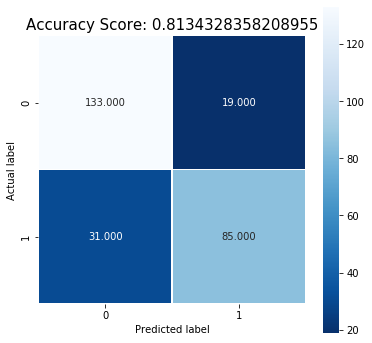

In [378]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics

cm = metrics.confusion_matrix(valid_y, pred_Y)
score = LogRmodel.score(valid_X, valid_y)
#print(cm)
print("Confusion matrix")
plt.figure(figsize=(6,6))
sns.heatmap(cm, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Accuracy Score: {0}'.format(score)
plt.title(all_sample_title, size = 15);


In [389]:
from sklearn.ensemble import RandomForestClassifier
random_forest = RandomForestClassifier(n_estimators=100)
random_forest.fit(train_X,train_y)
pred_y = random_forest.predict(valid_X)
random_forest.score(train_X, train_y)
acc_random_forest = round(random_forest.score(valid_X, valid_y) * 100, 2)
acc_random_forest

82.84

### Submission

In [386]:
test_pred_Y = model.predict(test_X)
submission = pd.DataFrame({
        "PassengerId": test_df["PassengerId"],
        "Survived": test_pred_Y
    })
# submission.to_csv('../output/submission.csv', index=False)

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,1
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0


In [390]:
test_pred_Y = random_forest.predict(test_X)
submission = pd.DataFrame({
        "PassengerId": test_df["PassengerId"],
        "Survived": test_pred_Y
    })
submission
# submission.to_csv('../output/submission.csv', index=False)

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,1
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0


In [391]:
submission.to_csv("submission.csv", index=False)